In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot
%matplotlib inline
import seaborn as sn
from fuzzywuzzy import process
import pickle
import warnings
warnings.filterwarnings('ignore')

C:\Users\pc\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
books = pd.read_csv(r'C:\Users\pc\Desktop\Python Libraries Crash\archive - Book\Books.csv')
users = pd.read_csv(r'C:\Users\pc\Desktop\Python Libraries Crash\archive - Book\Users.csv')
ratings = pd.read_csv(r'C:\Users\pc\Desktop\Python Libraries Crash\archive - Book\Ratings.csv')

## Popularity Based RS

In [3]:
# Display The top 100 Books with highest average ratings EDA

books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [5]:
books.shape , ratings.shape

((271360, 8), (1149780, 3))

In [6]:
# book_ratings = ratings.groupby('ISBN').mean().sort_values('Book-Rating',ascending=False)
# i = range(len(book_ratings))
# book_ratings = book_ratings.reset_index()[['ISBN','Book-Rating']]
# book_ratings
# book_ratings.merge(books,on='ISBN')

In [7]:
# concat dfs (books + ratings)
books_rat = ratings.merge(books,on='ISBN')

#select number of book-rating for each book
num_rating = books_rat.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating['Num_ratings'] = num_rating['Book-Rating'] 
num_rating.drop(columns='Book-Rating',inplace=True)
num_rating

#select the average of book-rating for each book
avg_rating = books_rat.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating['Avg_ratings'] = avg_rating['Book-Rating'] 
avg_rating.drop(columns='Book-Rating',inplace=True)
avg_rating

#concat the results
popular_df = num_rating.merge(avg_rating,on='Book-Title')
popular_df

#select the Num_ratings > 250  and filter only the top 100 book average 
popular_df = popular_df[popular_df['Num_ratings']>= 250].sort_values(by='Avg_ratings',ascending=False).head(100)
popular_df

#concat the top 100 with books df to get info of all this 100 book 
# popular_df = popular_df.merge(books,on='Book-Title') dont decomment this again
# #popular_df.drop_duplicates('Book-Title',inplace=True)
# book_info = ['Book-Title','Book-Author','Image-URL-M','Num_ratings','Avg_ratings']
# popular_df = popular_df[book_info]
popular_df

,Book-Title,Num_ratings,Avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
176827,The Beach House,435,3.347126
191926,The Hours: A Novel,294,3.346939
89780,Icy Sparks,309,3.346278
14351,Angela's Ashes (MMP) : A Memoir,326,3.337423


In [8]:
#concat the top 100 with books df to get info of all this 100 book 
popular_df = popular_df.merge(books,on='Book-Title')
popular_df.drop_duplicates('Book-Title',inplace=True)
book_info = ['Book-Title','Book-Author','Image-URL-M','Num_ratings','Avg_ratings']
popular_df = popular_df[book_info]
popular_df

,Book-Title,Book-Author,Image-URL-M,Num_ratings,Avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
...,...,...,...,...,...
338,The Beach House,James Patterson,http://images.amazon.com/images/P/0446612545.0...,435,3.347126
344,The Hours: A Novel,Michael Cunningham,http://images.amazon.com/images/P/0312305060.0...,294,3.346939
345,Icy Sparks,Gwyn Hyman Rubio,http://images.amazon.com/images/P/0142000205.0...,309,3.346278
347,Angela's Ashes (MMP) : A Memoir,Frank McCourt,http://images.amazon.com/images/P/0684872153.0...,326,3.337423


In [9]:
popular_df

,Book-Title,Book-Author,Image-URL-M,Num_ratings,Avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
...,...,...,...,...,...
338,The Beach House,James Patterson,http://images.amazon.com/images/P/0446612545.0...,435,3.347126
344,The Hours: A Novel,Michael Cunningham,http://images.amazon.com/images/P/0312305060.0...,294,3.346939
345,Icy Sparks,Gwyn Hyman Rubio,http://images.amazon.com/images/P/0142000205.0...,309,3.346278
347,Angela's Ashes (MMP) : A Memoir,Frank McCourt,http://images.amazon.com/images/P/0684872153.0...,326,3.337423


In [12]:
pickle.dump(popular_df,open('popular_df.pkl',mode='wb'))

## Collaborative based RS

In [10]:
# Similarity of rantings
books_rat = ratings.merge(books,on='ISBN')

#select only the users that are rated to more than 200 book
x = books_rat.groupby('User-ID').count()['Book-Rating'] > 200
users_like = x[x].index
filtred_rating = books_rat[books_rat['User-ID'].isin(users_like)]
#filtred_rating[filtred_rating['User-ID']==23768]
filtred_rating

#select only the books that has been rated by more than 50 users and 
y = filtred_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index
famous_books
final_ratings = filtred_rating[filtred_rating['Book-Title'].isin(famous_books)]
#final_ratings[final_ratings['Book-Title']=='The Notebook']
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


In [11]:
books_rat.shape , filtred_rating.shape , final_ratings.shape

((1031136, 10), (474007, 10), (58586, 10))

In [12]:
#pivot table contains each book and the users rating score (NaN = 0)
pivot = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating').fillna(0)
pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(706, 706)
[[1.         0.10255025 0.01220856 ... 0.12110367 0.07347567 0.04316046]
 [0.10255025 1.         0.2364573  ... 0.07446129 0.16773875 0.14263397]
 [0.01220856 0.2364573  1.         ... 0.04558758 0.04938579 0.10796119]
 ...
 [0.12110367 0.07446129 0.04558758 ... 1.         0.07085128 0.0196177 ]
 [0.07347567 0.16773875 0.04938579 ... 0.07085128 1.         0.10602962]
 [0.04316046 0.14263397 0.10796119 ... 0.0196177  0.10602962 1.        ]]


<AxesSubplot:>

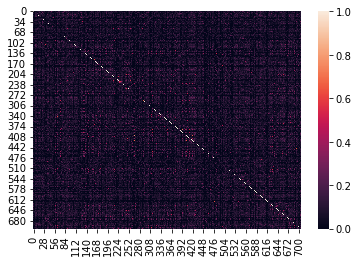

In [13]:
cos_sim = cosine_similarity(pivot)
print(cos_sim.shape)
print(cos_sim)
sn.heatmap(cos_sim)

In [14]:
pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [104]:
def test_matching(name):
    match_name = process.extractOne(name , pivot.index)[0]
    return match_name
    
test_matching("Year of ")

'Year of Wonders'

In [27]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [86]:
def recommend_0(name):
    #index = np.where(pivot.index==name)[0][0] #get the book index 
    index = np.where(pivot.index==test_matching(name))[0][0] #get the book index 
    sim_books = sorted(list(enumerate(cos_sim[index])) , key=lambda x:x[1] , reverse=True)[0:2]  #display the sim books 
    
    for i in sim_books:
        #print(i)
        #print(i[0])
        print(pivot.index[i[0]])
        
recommend_0("harry potter")

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)


In [89]:
def recommend(name):
    #index = np.where(pivot.index==name)[0][0] #get the book index 
    index = np.where(pivot.index==test_matching(name))[0][0] #get the book index 
    sim_books = sorted(list(enumerate(cos_sim[index])) , key=lambda x:x[1] , reverse=True)[0:21]  #display the sim books 
    
    df = []
    for i in sim_books:
        #print(i)
        #print(i[0])
        #print(pivot.index[i[0]])
        book = []
        sim_books_df = books[books['Book-Title'] == pivot.index[i[0]]]
        book.extend(list(sim_books_df.drop_duplicates('Book-Title')['Book-Title'].values))
        book.extend(list(sim_books_df.drop_duplicates('Book-Title')['Book-Author'].values))
        book.extend(list(sim_books_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        df.append(book)
    return df
        
#recommend("Year of Wonders")

In [91]:
s = recommend("harry")
s

[['Q Is for Quarry',
  'Sue Grafton',
  'http://images.amazon.com/images/P/0425192725.01.MZZZZZZZ.jpg'],
 ['\\O\\" Is for Outlaw"',
  'SUE GRAFTON',
  'http://images.amazon.com/images/P/0449003787.01.MZZZZZZZ.jpg'],
 ['Last Man Standing',
  'David Baldacci',
  'http://images.amazon.com/images/P/0446525804.01.MZZZZZZZ.jpg'],
 ['The Face of Deception',
  'Iris Johansen',
  'http://images.amazon.com/images/P/0553578022.01.MZZZZZZZ.jpg'],
 ['P Is for Peril',
  'Sue Grafton',
  'http://images.amazon.com/images/P/0449003795.01.MZZZZZZZ.jpg'],
 ['D Is for Deadbeat (Kinsey Millhone Mysteries (Paperback))',
  'Sue Grafton',
  'http://images.amazon.com/images/P/0553271636.01.MZZZZZZZ.jpg'],
 ['C Is for Corpse (Kinsey Millhone Mysteries (Paperback))',
  'Sue Grafton',
  'http://images.amazon.com/images/P/0553280368.01.MZZZZZZZ.jpg'],
 ['Under the Tuscan Sun',
  'Frances Mayes',
  'http://images.amazon.com/images/P/0767900383.01.MZZZZZZZ.jpg'],
 ["Daddy's Little Girl",
  'Mary Higgins Clark',
  'h

In [18]:
#using pivot index Book-Title to get the book indices in the pivot table
np.where(pivot.index=="Year of Wonders")[0][0]


701

In [19]:
pivot.index[701]

'Year of Wonders'

In [20]:
final_ratings.loc[701]
#display the sim scores of a given index and sort it by [1] acsending list only the first 5 books for ignore the 0 score
sorted(list(enumerate(cos_sim[0])) , key=lambda x:x[1] , reverse=True)[1:5]

[(47, 0.2702651417103732),
 (545, 0.26396193711234966),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397)]

In [92]:
pickle.dump(pivot,open('pivot.pkl',mode='wb'))
pickle.dump(books,open('books.pkl',mode='wb'))
pickle.dump(cos_sim,open('cos_sim.pkl',mode='wb'))

In [102]:
pivot.shape

(706, 810)

## Flask

In [21]:
books.loc[0]['Image-URL-S']

'http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg'

In [22]:
popular_df.columns

Index(['Book-Title', 'Book-Author', 'Image-URL-M', 'Num_ratings',
       'Avg_ratings'],
      dtype='object')

In [23]:
Title = list(popular_df['Book-Title'].values)
Author = list(popular_df['Book-Author'].values)
Image = list(popular_df['Image-URL-M'].values)
Votes = list(popular_df['Num_ratings'].values)
Rating = list(popular_df['Avg_ratings'].values)
Title

['Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'The Two Towers (The Lord of the Rings, Part 2)',
 'To Kill a Mockingbird',
 'The Da Vinci Code',
 'The Five People You Meet in Heaven',
 'The Catcher in the Rye',
 'The Lovely Bones: A Novel',
 '1984',
 'Prodigal Summer: A Novel',
 'Neverwhere',
 'The Secret Life of Bees',
 'Stupid White Men ...and Other Sorry Excuses for the State of the Nation!',
 "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
 'The Red Tent (Bestselling Backlist)',
 "The Hitchhiker's Guide to the Galaxy",
 'Nickel and Dimed: On (Not) 

In [24]:
Rating_ro = [round(r,2) for r in Rating]
Rating_ro

[5.85,
 5.82,
 5.74,
 5.5,
 5.18,
 5.01,
 4.95,
 4.9,
 4.88,
 4.7,
 4.64,
 4.55,
 4.55,
 4.47,
 4.45,
 4.45,
 4.45,
 4.45,
 4.36,
 4.35,
 4.33,
 4.33,
 4.29,
 4.27,
 4.26,
 4.22,
 4.17,
 4.11,
 4.1,
 4.09,
 4.09,
 4.09,
 4.08,
 4.06,
 4.04,
 4.01,
 4.01,
 4.0,
 4.0,
 3.96,
 3.96,
 3.9,
 3.89,
 3.88,
 3.83,
 3.82,
 3.82,
 3.8,
 3.78,
 3.77,
 3.77,
 3.75,
 3.75,
 3.72,
 3.71,
 3.7,
 3.7,
 3.68,
 3.68,
 3.66,
 3.63,
 3.63,
 3.62,
 3.61,
 3.61,
 3.59,
 3.58,
 3.58,
 3.58,
 3.57,
 3.56,
 3.55,
 3.53,
 3.53,
 3.51,
 3.5,
 3.5,
 3.46,
 3.44,
 3.43,
 3.43,
 3.43,
 3.43,
 3.42,
 3.42,
 3.42,
 3.41,
 3.4,
 3.4,
 3.39,
 3.39,
 3.39,
 3.36,
 3.36,
 3.35,
 3.35,
 3.35,
 3.35,
 3.34,
 3.31]